In [5]:
!pip install ultralytics --quiet
!pip install ipywidgets --quiet


In [6]:
!wget https://github.com/GingerBrains/object-detection/raw/main/best.pt -O best.pt


--2025-05-12 04:53:40--  https://github.com/GingerBrains/object-detection/raw/main/best.pt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/GingerBrains/object-detection/main/best.pt [following]
--2025-05-12 04:53:40--  https://raw.githubusercontent.com/GingerBrains/object-detection/main/best.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22531960 (21M) [application/octet-stream]
Saving to: ‘best.pt’

best.pt             100%[===================>]  21.49M   113MB/s    in 0.2s    

2025-05-12 04:53:41 (113 MB/s) - ‘best.pt’ saved [22531960/22531960]



In [7]:
from ultralytics import YOLO

# Load the pretrained model
model = YOLO('best.pt')


✅ Image uploaded. Detecting weapons...

0: 480x800 1 Pistol, 579.3ms
Speed: 3.4ms preprocess, 579.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


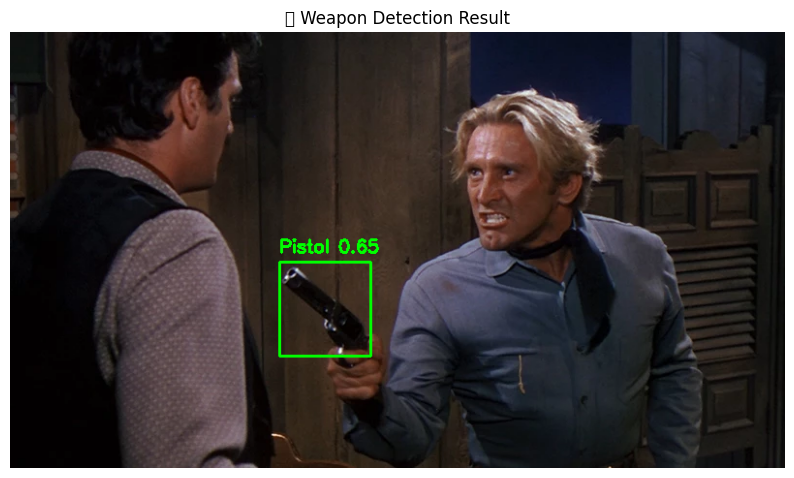

In [23]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create an upload button
upload_btn = widgets.FileUpload(accept='image/*', multiple=False)

def handle_upload(change):
    clear_output(wait=True)
    print("✅ Image uploaded. Detecting weapons...")

    # Get the uploaded image
    uploaded_file = next(iter(upload_btn.value.values()))
    image_bytes = uploaded_file['content']
    image = Image.open(io.BytesIO(image_bytes)).convert("RGB")
    image_np = np.array(image)
    image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    # Perform detection
    results = model(image_bgr)[0]

    # Draw bounding boxes
    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        label = f"{model.names[cls]} {conf:.2f}"
        cv2.rectangle(image_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_bgr, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Convert back to RGB and display
    result_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(result_rgb)
    plt.axis("off")
    plt.title("🔫 Weapon Detection Result")
    plt.show()

# Bind the upload button to the handler
upload_btn.observe(handle_upload, names='value')

# Display the upload button
print("📤 Upload an image to detect weapons:")
display(upload_btn)
